# <p style="padding: 15px; background-color: #778899; font-family: 'JetBrains Mono'; font-weight: bold; font-size: 150%; color: #f2f2f0; letter-spacing: 2px; text-align: center; border-radius: 8px;">Emotion Recognition Project</p>

<blockquote style="
    margin-right: auto; 
    margin-left: auto; 
    background-color:#222; 
    padding: 15px; 
    border-radius: 8px;
    border-left: none;
">
<p style="
    font-size: 20px;
    font-family: 'JetBrains Mono';
    color: #f2f2f0;
">
    <b>Some important characteristics of the dataset:</b> 📜
</p>

<ul style="
    font-size: 16px;
    font-family: 'JetBrains Mono';
    color: #f2f2f0;
    margin-left: 8px;
    margin-right: 8px;
    margin-bottom: 20px;
">
    <li>The target variable, emotion, is integer encoded with 7 possible label values. You can find descriptions of the label values in the Data tab of the competition.</li>
    <li>The metric used for the contest is classification accuracy.</li>
    <li>There are 28,709 training images.</li>
    <li>The images are grayscale with a resolution of 48x48.</li>
    <li>Since the images are relatively small and in grayscale, the pixel values for images in the training are stored in a single text file rather than as individual images. The test data is provided in a similar way.</li>
</ul>

<p style="
    font-size: 20px;
    font-family: 'JetBrains Mono';
    color:#f2f2f0;
">
    <b>Task</b> 🕵
</p>

<p style="
    font-size: 16px;
    font-family: 'JetBrains Mono';
    color: #f2f2f0;
    margin-left: 20px;
    margin-right: 20px;
    margin-bottom: 20px;
">
    The task is to categorize each face based on the emotion shown in the facial expression in to one of seven categories:
</p>

| categories  | emotion  |
|:---:|:---|
| 0  | Angry  |
| 1  |  Disgust |
| 2  |  Fear |
| 3  |  Happy |
| 4  |  Sad |
| 5  |  Surprise |
| 6  | Neutral |

<p style="
    font-size: 20px;
    font-family: 'JetBrains Mono';
    color: #f2f2f0;
">
    <b>See More Here</b> 📈
</p>

<p style="
    font-size: 16px;
    font-family: 'JetBrains Mono';
    color: #f2f2f0;
    margin-left: 20px;
    margin-right: 20px;
    margin-bottom: 20px;
">
    <a href="https://www.kaggle.com/competitions/challenges-in-representation-learning-facial-expression-recognition-challenge/overview" style="color: 	#00BFFF;"><b>Facial Emotion Recognition Dataset</b></a>
</p>

</blockquote>

In [ ]:
pip install torchsummary

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import copy
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary
from torch.utils.data import Dataset, DataLoader, TensorDataset
from torchvision import transforms
import torchvision

from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

from colorama import Fore, Style

CLR = (Fore.BLACK) if False else (Style.BRIGHT + Fore.WHITE)
RED = Style.BRIGHT + Fore.RED
BLUE = Style.BRIGHT + Fore.BLUE
CYAN = Style.BRIGHT + Fore.CYAN


# Matplotlib & Seaborn settings.
FONT_COLOR = "#000"
BACKGROUND_COLOR = "#F6F5F5"
DF_CMAP = sns.light_palette("#252131", as_cmap=True)
MY_RC = {
    "axes.labelcolor": FONT_COLOR,
    "axes.labelsize": 10,
    "axes.labelpad": 15,
    "axes.labelweight": "bold",
    "axes.titlesize": 14,
    "axes.titleweight": "bold",
    "axes.titlepad": 15,
    "xtick.labelsize": 7,
    "xtick.color": FONT_COLOR,
    "ytick.labelsize": 7,
    "ytick.color": FONT_COLOR,
    "figure.titlesize": 14,
    "figure.titleweight": "bold",
    "figure.facecolor": BACKGROUND_COLOR,
    "figure.edgecolor": BACKGROUND_COLOR,
    "figure.dpi": 72,  # Locally Seaborn uses 72, meanwhile Kaggle 96.
    "font.size": 14,
    "font.family": "Serif",
    "text.color": FONT_COLOR,
}

sns.color_palette("hls", 8)
sns.set_theme(rc=MY_RC)



<p style="
    font-size: 20px;
    font-family: 'JetBrains Mono';
    border-bottom: 3px solid #778899;
">
    <b>Notes</b> 📜
</p>

<blockquote style="
    margin-right: auto; 
    margin-left: auto; 
    background-color:#222; 
    padding: 15px; 
    border-radius: 8px;
    border-left: none;
">
<ul style="
    font-size: 16px;
    font-family: 'JetBrains Mono';
    color: #f2f2f0;
    margin-left: 8px;
    margin-right: 8px;
    margin-top: 4px; 
    margin-bottom: 4px;
">
    <li>In this section, we'll look over the dataset in a general manner.</li>
    <li>Later, we will split the dataset into training, validation, and test sets.</li>
</ul>
</blockquote>


In [ ]:
ON_KAGGLE = os.getenv("KAGGLE_KERNEL_RUN_TYPE") is not None

if ON_KAGGLE:
      data = pd.read_csv('/kaggle/input/challenges-in-representation-learning-facial-expression-recognition-challenge/icml_face_data.csv')
else:
      data = pd.read_csv('Data/icml_face_data.csv')
      
data

In [ ]:
data.info()

In [ ]:
data.isnull().sum()

In [ ]:
data[' Usage'].value_counts()

<p style="
    font-size: 20px;
    font-family: 'JetBrains Mono';
    border-bottom: 3px solid #778899;
">
    <b>Notes</b> 📜
</p>

<blockquote style="
    margin-right: auto; 
    margin-left: auto; 
    background-color:#222; 
    padding: 15px; 
    border-radius: 8px;
    border-left: none;
">
<ul style="
    font-size: 16px;
    font-family: 'JetBrains Mono';
    color: #f2f2f0;
    margin-left: 8px;
    margin-right: 8px;
    margin-top: 4px; 
    margin-bottom: 4px;
">
    <li>This dictionary maps numerical labels to corresponding emotion categories for classification tasks.</li>
    <li>In Graphs we see, that `Disgust` emotion has small percentage of data</li>
    <li>In <code>prepare_data()</code> we split data into image and label tensors</li>
</ul>
</blockquote>


In [ ]:
emotions = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}
class_percentages = {}
num_labels = 7

In [ ]:
class_weight = dict(
                  zip(emotions.values(), round(((data[data[' Usage']=='Training']['emotion'].value_counts()).sort_index()) 
                                          / len(data[data[' Usage']=='Training']['emotion']) * 100 
                                          , 1
                                    )
                  )
            )



class_weight_df = pd.DataFrame(list(class_weight.items()), columns=['Class', 'Weight'])


plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Class', y='Weight', data=class_weight_df)

for index, row in class_weight_df.iterrows():
    barplot.text(index, row.Weight, round(row.Weight, 1), color='black', ha="center", va='bottom')

plt.ylabel('Weight Percentage')
plt.title('Class Weights')

plt.show()

In [ ]:
def prepare_data(data):
    """ Prepare data for modeling 
        input: data frame with labels und pixel data
        output: image and label tensors """
    
    image_array = np.zeros(shape=(len(data), 48, 48))
    image_label = np.array(list(map(int, data['emotion'])))

    for i, row in enumerate(data.index):
        image = np.fromstring(data.loc[row, ' pixels'], dtype=int, sep=' ')
        image = np.reshape(image, (48, 48))
        image_array[i] = image
        
    image_array = torch.from_numpy(image_array)
    image_label = torch.from_numpy(image_label)

        
    return image_array, image_label

In [ ]:
df_train_array, df_train_label = prepare_data(data[data[' Usage']=='Training']) # modified train set
df_val_array, df_val_label = prepare_data(data[data[' Usage']=='PublicTest'])
df_test_array, df_test_label = prepare_data(data[data[' Usage']=='PrivateTest'])


print(f"{RED}Train:", f"{CLR}{df_train_array.shape}", f"{df_train_label.shape}")
print(f"{RED}Validation:", f"{CLR}{df_val_array.shape}", f"{df_val_label.shape}")
print(f"{RED}Test:", f"{CLR}{df_test_array.shape}", f"{df_test_label.shape}")




<p style="
    font-size: 20px;
    font-family: 'JetBrains Mono';
    border-bottom: 3px solid #778899;
">
    <b>Notes</b> 📜
</p>

<blockquote style="
    margin-right: auto; 
    margin-left: auto; 
    background-color:#222; 
    padding: 15px; 
    border-radius: 8px;
    border-left: none;
">
<ul style="
    font-size: 16px;
    font-family: 'JetBrains Mono';
    color: #f2f2f0;
    margin-left: 8px;
    margin-right: 8px;
    margin-top: 4px; 
    margin-bottom: 4px;
">
    <li>This code snippet prepares training, validation, and test image datasets for a machine learning model using PyTorch. It reshapes the datasets into a format suitable for a convolutional neural network (with 1 channel and 48x48 pixel images).</li>
    <li>Converts the data type to torch.float32, and normalizes the pixel values to the range [0, 1] by dividing by 255.</li>
    <li>Encoding of the target value</li>
</ul>
</blockquote>


In [ ]:
train_images = df_train_array.view((df_train_array.shape[0], 1, 48, 48))
train_images = train_images.to(dtype = torch.float32) / 255

val_images = df_val_array.view((df_val_array.shape[0], 1, 48, 48))
val_images = val_images.to(dtype = torch.float32) / 255

test_images = df_test_array.view((df_test_array.shape[0], 1, 48, 48))
test_images = test_images.to(dtype = torch.float32) / 255

In [ ]:
def to_categorical_torch(y, num_classes):
    
    return torch.eye(num_classes)[y]


train_labels = to_categorical_torch(df_train_label, 7)
val_labels = to_categorical_torch(df_val_label, 7)
test_labels = to_categorical_torch(df_test_label, 7)


<p style="
    font-size: 20px;
    font-family: 'JetBrains Mono';
    border-bottom: 3px solid #778899;
">
    <b>Notes</b> 📜
</p>

<blockquote style="
    margin-right: auto; 
    margin-left: auto; 
    background-color:#222; 
    padding: 15px; 
    border-radius: 8px;
    border-left: none;
">
<ul style="
    font-size: 16px;
    font-family: 'JetBrains Mono';
    color: #f2f2f0;
    margin-left: 8px;
    margin-right: 8px;
    margin-top: 4px; 
    margin-bottom: 4px;
">
    <li style='padding-bottom: 10px;'><code>plot_examples():</code> Plots 5 example images for a specified emotion label.</li>
    <li style='padding-bottom: 10px;'><code>plot_all_emotions():</code> Similar in purpose to plot_examples but instead plots one example for each of the 7 emotions in a single row.</li>
    <li style='padding-bottom: 10px;'><code>plot_image_and_emotion():</code> This function plots a specific test image alongside a bar chart comparing the predicted emotion probabilities against the actual label. It's useful for evaluating the model's performance on individual samples by visually comparing the prediction against the truth.
    </li>
    <li style='padding-bottom: 10px;'><code>plot_compare_distributions():</code> Compares the emotion label distributions between two different arrays (e.g., predicted vs. actual labels) through bar charts. It calculates the distribution of each emotion within the provided arrays and visualizes them side by side for comparison. This is particularly useful for analyzing the model's prediction bias or skewness towards certain emotions.
    </li>
</ul>
</blockquote>


In [ ]:
def plot_examples(label=0):
    fig, axs = plt.subplots(1, 5, figsize=(25, 12))
    fig.subplots_adjust(hspace = .2, wspace=.2)
    axs = axs.ravel()
    for i in range(5):
        idx = data[data['emotion']==label].index[i]
        axs[i].imshow(train_images[idx][:,:,0], cmap='gray')
        axs[i].set_title(emotions[train_labels[idx].argmax()])
        axs[i].set_xticklabels([])
        axs[i].set_yticklabels([])
      
      
        
def plot_all_emotions():
    fig, axs = plt.subplots(1, 7, figsize=(16, 8))
    fig.subplots_adjust(hspace = .2, wspace=.2)
    axs = axs.ravel()
    for i in range(7):
        idx = data[data['emotion']==i].index[i]
        axs[i].imshow(train_images[idx][0][:,:], cmap='gray')
        axs[i].set_title(emotions[train_labels[idx].argmax().item()]) 
        axs[i].set_xticklabels([])
        axs[i].set_yticklabels([])
        
        
        
def plot_image_and_emotion(test_image_array, test_image_label, pred_test_labels, image_number):
    """ Function to plot the image and compare the prediction results with the label """
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=False)
    
    bar_label = emotions.values()
    
    axs[0].imshow(test_image_array[image_number], 'gray')
    axs[0].set_title(emotions[test_image_label[image_number]])
    
    axs[1].bar(bar_label, pred_test_labels[image_number], color='orange', alpha=0.7)
    axs[1].grid()
    
    plt.show()
  
  
    
def plot_compare_distributions(array1, array2, title1='', title2=''):
    df_array1 = pd.DataFrame()
    df_array2 = pd.DataFrame()
    df_array1['emotion'] = array1.argmax(axis=1)
    df_array2['emotion'] = array2.argmax(axis=1)

    
    fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=False)
    x = emotions.values()
    
    y = df_array1['emotion'].value_counts()
    keys_missed = list(set(emotions.keys()).difference(set(y.keys())))
    for key_missed in keys_missed:
        y[key_missed] = 0
    axs[0].bar(x, y.sort_index(), color='green')
    axs[0].set_title(title1)
    axs[0].grid()
    
    y = df_array2['emotion'].value_counts()
    keys_missed = list(set(emotions.keys()).difference(set(y.keys())))
    for key_missed in keys_missed:
        y[key_missed] = 0
    axs[1].bar(x, y.sort_index())
    axs[1].set_title(title2)
    axs[1].grid()
    
    plt.show()

In [ ]:
plot_all_emotions()

In [ ]:
plot_compare_distributions(train_labels, val_labels, title1='train labels', title2='val labels')

# <p style="padding: 15px; background-color: #778899; font-family: 'JetBrains Mono'; font-weight: bold; font-size: 125%; color: #f2f2f0; letter-spacing: 2px; text-align: center; border-radius: 8px;">Model Selection</p>

In [ ]:
class ConvNet(nn.Module):
    
    def __init__(self):
        super(ConvNet, self).__init__()
        
        self.features = nn.Sequential(
            
            # First convolutional block
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding='same'),
            nn.ReLU(),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding='same'),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.2),
            nn.BatchNorm2d(32),
            
            
            # Second convolutional block
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding='same'),
            nn.ReLU(),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding='same'),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.2),
            nn.BatchNorm2d(64),
            
            # Third convolutional block
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding='same'),
            nn.ReLU(),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding='same'),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.2),
            nn.BatchNorm2d(128),
        )
        
        
        self.classifier = nn.Sequential(
            nn.Linear(6*6*128, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.BatchNorm1d(32),
            nn.Linear(32, 7),
            nn.ReLU()  
        )
    
    def forward(self, x):
        x = self.features(x)         
        x = x.view(-1, 6*6*128)       
        x = self.classifier(x)        
        return x

In [ ]:
# See Model
model = ConvNet()
# summary(model,  (1, 48, 48))

### Device configuration


In [ ]:
print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)



if torch.cuda.is_available():
      device = torch.device('cuda')
      print(f"Using device: {device}")
      print(torch.cuda.get_device_name(0))

elif torch.backends.mps.is_available():
      device = torch.device("mps")
      print(f"Using device: {device}")
      print('Running on the GPU')
else:
      device = torch.device("cpu")
      print('Running on the CPU')

      

<p style="
    font-size: 20px;
    font-family: 'JetBrains Mono';
    border-bottom: 3px solid #778899;
">
    <b>Notes</b> 📜
</p>

<blockquote style="
    margin-right: auto; 
    margin-left: auto; 
    background-color:#222; 
    padding: 15px; 
    border-radius: 8px;
    border-left: none;
">
<ul style="
    font-size: 16px;
    font-family: 'JetBrains Mono';
    color: #f2f2f0;
    margin-left: 8px;
    margin-right: 8px;
    margin-top: 4px; 
    margin-bottom: 4px;
">
    <li>The <code>calculate_weights()</code> function is designed for training and validating a PyTorch model across multiple epochs, with functionality to handle both training and validation phases within each epoch. It also supports dynamic reporting of performance metrics (accuracy and loss) and the capability to save the best model based on validation accuracy. </li>
    <li>The <code>plot_losses()</code> function visualizes the evolution of validation loss across training epochs for various batch sizes, allowing for the analysis of how different batch sizes impact model training effectiveness. By plotting loss against epochs for a specific learning rate, it provides a clear visual comparison and understanding of the training dynamics. </li>
    <li>The <code>plot_accuracy()</code> function provides a graphical representation of how validation accuracy evolves through the epochs under varying batch sizes, illustrating the effect of batch size on model accuracy during training. By correlating accuracy trends with different batch sizes, it facilitates a comprehensive analysis of training outcomes at a specified learning rate, enhancing the interpretability of model performance over time. </li>
    <li>The <code>tuning_model()</code> function systematically explores a combination of hyperparameters, namely learning rates and batch sizes, to train and evaluate a neural network model, aiming to identify configurations that optimize its performance in terms of loss and accuracy. Through iterative training sessions, each followed by performance visualization, this function aids in understanding the impact of these hyperparameters on model behavior, guiding the selection of optimal training settings for enhanced model accuracy and efficiency.</li>
</ul>
</blockquote>


In [ ]:
def calculate_weights(data_loaders, data_sizes, model, optimizer, criterion, batch, epochs = 10, training = True):
      """
            Trains and validates a PyTorch model, optionally saving the best-performing model based on validation accuracy.

            Parameters:
            - data_loaders (dict): Data loaders for the datasets. Should contain 'train' and 'val' for training and validation sets.
            - data_sizes (dict): Sizes of the datasets. Should contain 'train' and 'val' keys with the dataset sizes as values.
            - model (torch.nn.Module): The model to be trained and evaluated.
            - optimizer (torch.optim.Optimizer): Optimizer for updating model parameters.
            - criterion (callable): Loss function for evaluating model performance.
            - batch (int): Batch size used for training and validation, mainly for reporting purposes.
            - epochs (int, optional): Number of training epochs. Default is 10.
            - training (bool, optional): Flag indicating whether the model should be trained (True) or only evaluated (False). Default is True.

            Returns:
            If training is True:
                  - losses (dict): Dictionary containing the recorded validation losses for each batch size.
                  - accuracies (dict): Dictionary containing the recorded validation accuracies for each batch size.
            If training is False:
                  - loss_values (list): List of loss values recorded during validation.
                  - acc_values (list): List of accuracy values recorded during validation.

            The function iterates over the specified number of epochs, performing training and validation as specified. During
            the training phase, it executes forward passes, calculates losses, performs backpropagation, and updates model
            parameters. During the validation phase, it evaluates the model's performance on the validation set. Performance
            metrics (loss and accuracy) are printed periodically and the best model is saved based on validation accuracy.
      """
      
      loss_values = []
      acc_values = []
      since = time.time()
      best_acc = 0.0
      
      for epoch in range(epochs):
            
            for phase in ['train', 'val']:
                  
                  if phase == 'train':
                        model.train()
                  else:
                        model.eval()
                  
                  # For calculating Accuracy and Loss      
                  running_corrects = 0.0
                  running_loss = 0.0      
                  n_total_steps = len(data_loaders[phase]) 
                  
                        
                  for i, (inputs, labels) in enumerate(data_loaders[phase]):

                        # Move images and labels to device if using GPU
                        inputs, labels = inputs.to(device), labels.to(device)
                        
                        # Forward pass
                        # Track Histroy if only in train
                        with torch.set_grad_enabled(phase == 'train'):
                              
                        
                              outputs = model(inputs)
                              _, preds = torch.max(outputs, 1)  
                              loss = criterion(outputs, labels)

                              if phase == 'train':
                        
                                    # Backward and optimize
                                    optimizer.zero_grad()
                                    loss.backward()
                                    optimizer.step()
                        
                        # statistics
                        running_loss += loss.item() * inputs.size(0)
                        running_corrects += torch.sum(preds == labels.data)  
                        
                        
                  
                  epoch_acc = running_corrects.float() / data_sizes[phase]
                  epoch_loss = running_loss / data_sizes[phase]
                  
                  if phase == 'val':
                        acc_values.append(epoch_acc.cpu())
                        loss_values.append(epoch_loss)
                        
                  
                  if epoch % round(epochs / 4) == 0:
                              
                        print(f'{CLR}{phase}:  {RED}Batch: {CLR}{batch}, {RED}Epoch {CLR}[{epoch+1}/{epochs}], {RED}Step {CLR}[{i+1}/{n_total_steps}], {RED}Loss: {BLUE}{loss.item():.4f}, {RED}Acc: {BLUE}{epoch_acc:.4f}') 
  
  
                
                  if training:
                        
                       
                        # Deep copy the model
                        if phase == 'val' and epoch_acc > best_acc:
                              best_acc = epoch_acc
                              # best_model_wts = copy.deepcopy(model.state_dict())
                              torch.save(model, 'best-model.pt')
                              torch.save(model.state_dict(), 'best-model-parameters.pt')
                  
        
      time_elapsed = time.time() - since
      print(f"{CLR}Training complete in {(time_elapsed // 60):.0f}m {(time_elapsed % 60):.0f}s")  
      print()  
    
      if training:
            accuracies, losses = {} , {}
            accuracies.update({batch: acc_values})
            losses.update({batch: loss_values})
            return losses, accuracies
      
        
      return loss_values , acc_values





def plot_losses(lr_rate, losses, epochs):
      """
            Plots the validation loss over epochs for different batch sizes.

            This function takes the validation losses recorded during the training of a model across different epochs and plots
            these losses to visualize how the model's performance has evolved over time. Each line in the plot represents a different
            batch size, allowing for the comparison of how batch size affects the training process.

            Parameters:
            - lr_rate (float): The learning rate used during training. This is used for titling the plot to indicate which learning
              rate's results are being visualized.
            - losses (dict): A dictionary where each key is a batch size and each value is a list of loss values recorded at each epoch
              during training with that batch size.
            - epochs (int): The total number of epochs training was run for. This dictates the range of the x-axis in the plot.

            Returns:
            - None: This function does not return any value. It displays a matplotlib plot.

            The function creates a plot with the epoch number on the x-axis and the loss value on the y-axis. Each batch size's loss 
            evolution is plotted with a unique line in the graph. The plot is then displayed with a title indicating the learning rate 
            used, and a legend showing the batch sizes.
      """
      
      plt.figure(figsize=(24, 8))
      
      for key, value in losses.items():
            plt.plot(range(epochs), value, label = f'For batch: {key}')
      
      plt.title(f'Validation Loss by Epoch, Learning Rate : {lr_rate}')
      plt.xlabel('Epoch')
      plt.ylabel('Loss')      
      plt.legend()
      plt.show()


def plot_accuracy(lr_rate, accuracies, epochs):
      """
            Plots the validation accuracy over epochs for different batch sizes.

            This function visualizes the change in validation accuracy across training epochs for a neural network model, with each line 
            in the plot corresponding to a different batch size. This allows for an easy comparison of how batch size impacts the model's
            accuracy over time during training. The learning rate is specified in the plot title to indicate under which training condition
            these accuracies were achieved.

            Parameters:
            - lr_rate (float): The learning rate used during the training sessions. This information is utilized to title the plot for
              clarity on the conditions under which the results were produced.
            - accuracies (dict): A dictionary with batch sizes as keys and lists of accuracy values as values. Each list contains the
              model's accuracy at each epoch for the corresponding batch size.
            - epochs (int): The total number of epochs for which the model was trained. This defines the range for the x-axis in the plot.

            Returns:
            - None: This function solely generates and displays a matplotlib plot and does not return any value.

            The function plots the epoch count on the x-axis against the accuracy on the y-axis, with each batch size's accuracy trend 
            being represented by a distinct line. A legend is included to identify the lines corresponding to different batch sizes, and 
            the plot is displayed with a title that includes the learning rate.
      """
      plt.figure(figsize=(18, 8))

      for key, value in accuracies.items():
            plt.plot(range(epochs), value, label = f"For batch: {key}")
            
      plt.title(f'Validation Accuracy by Epoch, Learning Rate : {lr_rate}')
      plt.xlabel('Epoch')
      plt.ylabel('Accuracy')
      plt.legend()
      plt.show()
      
      

def reset_weights(m):
    """
    Resets model weights to avoid weight leakage between training runs with different batch sizes.
    """
    if hasattr(m, 'reset_parameters'):
        m.reset_parameters()
        

def initialize_optimizer(model, learning_rate):
    
    return torch.optim.Adam(model.parameters(), lr=learning_rate)



def tuning_model(model, criterion, epochs, batch_sizes, learning_rate):
      """
            Conducts model tuning over specified batch sizes and learning rates, evaluating performance in terms of loss and accuracy.

            This function iterates over a range of learning rates and batch sizes to train a given model. It evaluates the model's performance 
            on both training and validation datasets across a predefined number of epochs. The function utilizes the `calculate_weights` 
            function for training with dynamic weighting to address class imbalance. After training, it plots loss and accuracy metrics 
            to visually represent the model's performance under different hyperparameter settings.

            Parameters:
            - model (torch.nn.Module): The neural network model to be tuned.
            - criterion (torch.nn.Module): The loss function used for model training.
            - epochs (int): The number of training epochs for each combination of learning rate and batch size.
            - batch_sizes (list of int): A list of batch sizes to use for training the model.
            - learning_rate (list of float): A list of learning rates to use for optimizing the model.

            Returns:
            - None: This function does not return any value. It directly affects the model by training it under various conditions and
              plots the resulting metrics for analysis.

            Side Effects:
            - The function modifies the input model in-place due to the training process.
            - Generates plots showing the validation loss and accuracy for each combination of learning rate and batch size over the 
              specified number of epochs.

            Note:
            - Ensure that `train_dataset` and `val_dataset` are defined and accessible within the scope where this function is called.
            - `calculate_weights`, `reset_weights`, `initialize_optimizer`, `plot_losses`, and `plot_accuracy` must be defined in the same 
              script or imported from other modules.
      """
            
      losses = {}
      accuracies = {}
      all_time_start = time.time()

      train_dataset, val_dataset = TensorDataset(train_images, df_train_label), TensorDataset(val_images, df_val_label)
      len_train_data, len_val_data = len(train_dataset), len(val_dataset)
      
      
      
      for lr_rate in learning_rate:
            print(f"For Learning Rate: {RED}{lr_rate}")
      
            for batch in batch_sizes:

                  train_loader = DataLoader(train_dataset, batch_size=batch, shuffle=True)
                  val_loader = DataLoader(val_dataset, batch_size=batch, shuffle=True)
                  
                  # For calculate_weights()
                  data_loaders = {'train': train_loader, 'val': val_loader}
                  data_sizes = {'train': len_train_data, 'val': len_val_data}
                  

                  model.apply(reset_weights)
                  optimizer = initialize_optimizer(model, lr_rate) 

                  # Train the model with the current batch size
                  loss_batch, accuracy_batch = calculate_weights(data_loaders, data_sizes, model, optimizer, criterion, batch = batch, epochs = epochs, training=False)
                  
                  
                  losses.update({batch: loss_batch})
                  accuracies.update({batch: accuracy_batch})


            all_time = time.time() - all_time_start    

            print(f"{BLUE}Training complete in {(all_time // 60):.0f}m {(all_time % 60):.0f}s")  
            print(f"{BLUE}Ploting Losses and Accuracies")      
            print()  


            plot_losses(lr_rate, losses, epochs)
            print()
            plot_accuracy(lr_rate, accuracies, epochs)
      
      
      all_time = time.time() - all_time_start    
      print(f"{BLUE}Finished All Trainings !!!")
      print(f"{BLUE}Training complete in {(all_time // 60):.0f}m {(all_time % 60):.0f}s")  

      


      
      

# Model Tuning

### Normalize Weights for CrossEntropyLoss

In [ ]:
print(class_weight)

# Convert percentages to weights inversely proportional to their representation
weights = {class_id: 1.0 / (percentage / 100) for class_id, percentage in class_weight.items()}

# Normalize weights to make the smallest one equal to 1 
min_weight = min(weights.values())
normalized_weights = {class_id: weight / min_weight for class_id, weight in weights.items()}

# Convert to a tensor
weights_tensor = torch.tensor(list(normalized_weights.values()), dtype=torch.float).to(device)

print(weights_tensor)

For Learning Rate: 0.001
train:  Batch: 64, Epoch [1/150], Step [449/449], Loss: 2.1143, Acc: 0.2156
val:  Batch: 64, Epoch [1/150], Step [57/57], Loss: 1.8577, Acc: 0.2956
train:  Batch: 64, Epoch [39/150], Step [449/449], Loss: 0.4910, Acc: 0.7904
val:  Batch: 64, Epoch [39/150], Step [57/57], Loss: 0.8480, Acc: 0.6147
train:  Batch: 64, Epoch [77/150], Step [449/449], Loss: 0.6531, Acc: 0.8756
val:  Batch: 64, Epoch [77/150], Step [57/57], Loss: 0.1002, Acc: 0.6166
train:  Batch: 64, Epoch [115/150], Step [449/449], Loss: 0.2356, Acc: 0.9053
val:  Batch: 64, Epoch [115/150], Step [57/57], Loss: 0.0121, Acc: 0.6119
Training complete in 10m 55s

train:  Batch: 128, Epoch [1/150], Step [225/225], Loss: 2.0258, Acc: 0.1792
val:  Batch: 128, Epoch [1/150], Step [29/29], Loss: 1.7602, Acc: 0.2045
train:  Batch: 128, Epoch [39/150], Step [225/225], Loss: 0.8625, Acc: 0.7916
val:  Batch: 128, Epoch [39/150], Step [29/29], Loss: 1.0541, Acc: 0.5910
train:  Batch: 128, Epoch [77/150], Step [2

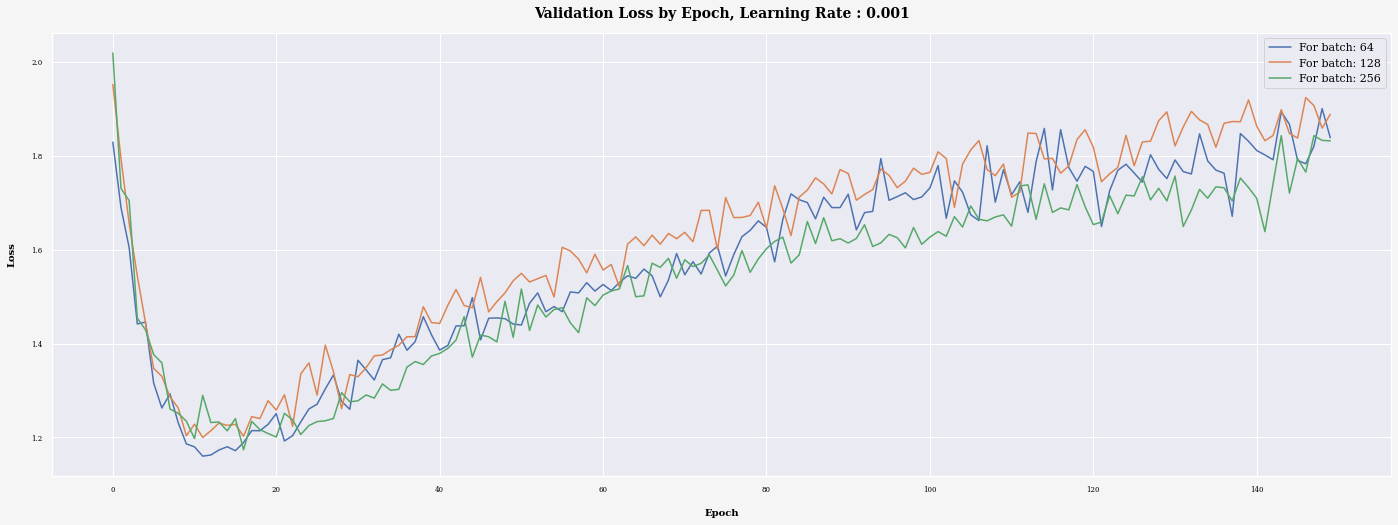

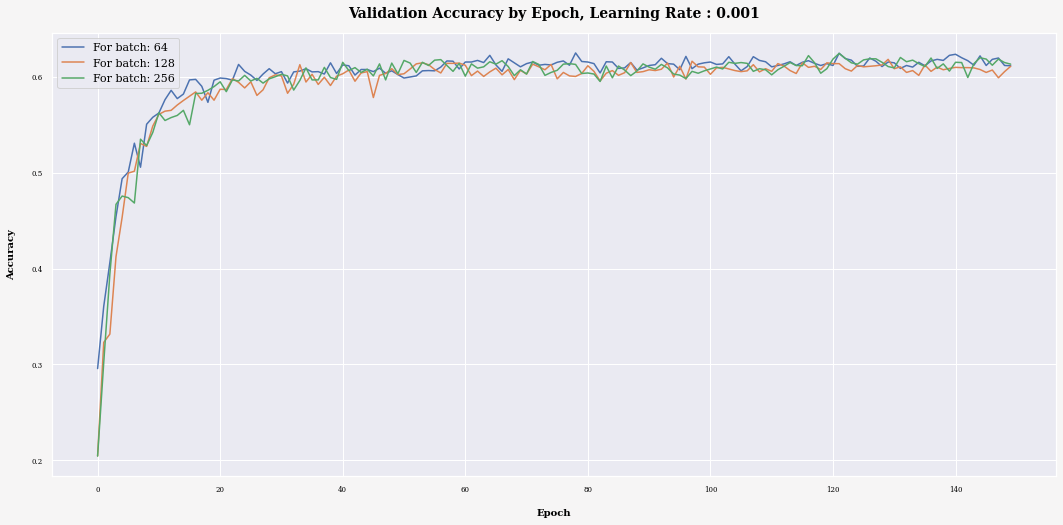

For Learning Rate: 0.0001
train:  Batch: 64, Epoch [1/150], Step [449/449], Loss: 1.8883, Acc: 0.1986
val:  Batch: 64, Epoch [1/150], Step [57/57], Loss: 1.9785, Acc: 0.2533
train:  Batch: 64, Epoch [39/150], Step [449/449], Loss: 0.7267, Acc: 0.7341
val:  Batch: 64, Epoch [39/150], Step [57/57], Loss: 0.8099, Acc: 0.5913
train:  Batch: 64, Epoch [77/150], Step [449/449], Loss: 0.3479, Acc: 0.8537
val:  Batch: 64, Epoch [77/150], Step [57/57], Loss: 0.7173, Acc: 0.6082
train:  Batch: 64, Epoch [115/150], Step [449/449], Loss: 0.2989, Acc: 0.8977
val:  Batch: 64, Epoch [115/150], Step [57/57], Loss: 2.2817, Acc: 0.6013
Training complete in 10m 57s

train:  Batch: 128, Epoch [1/150], Step [225/225], Loss: 1.9397, Acc: 0.1826
val:  Batch: 128, Epoch [1/150], Step [29/29], Loss: 2.0107, Acc: 0.2221
train:  Batch: 128, Epoch [39/150], Step [225/225], Loss: 0.9316, Acc: 0.7149
val:  Batch: 128, Epoch [39/150], Step [29/29], Loss: 0.4768, Acc: 0.5779
train:  Batch: 128, Epoch [77/150], Step [

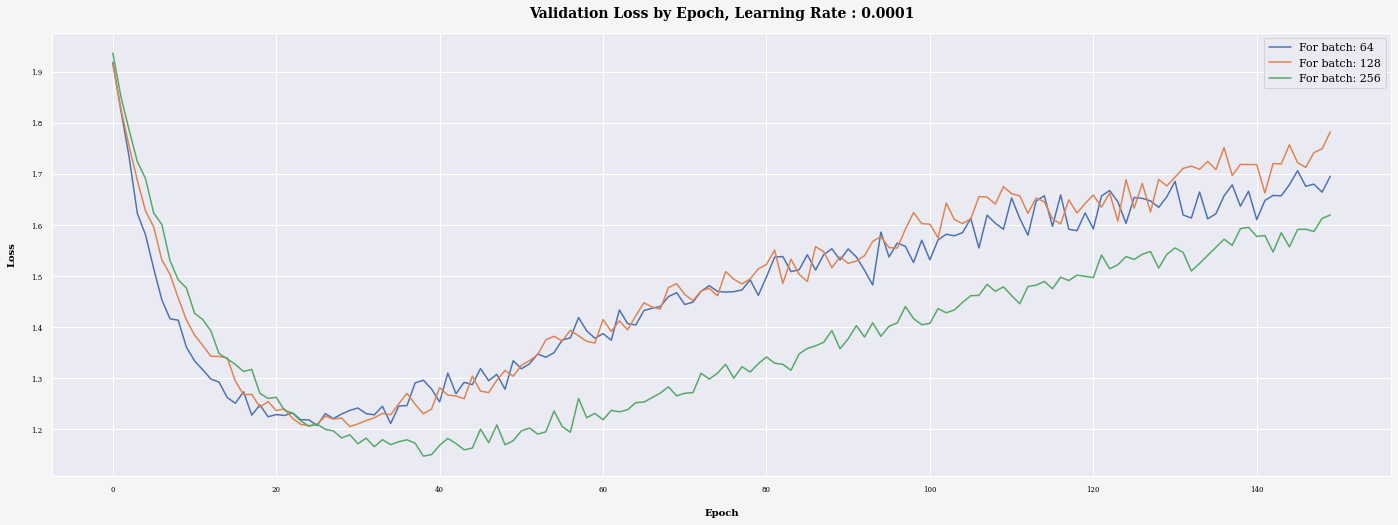

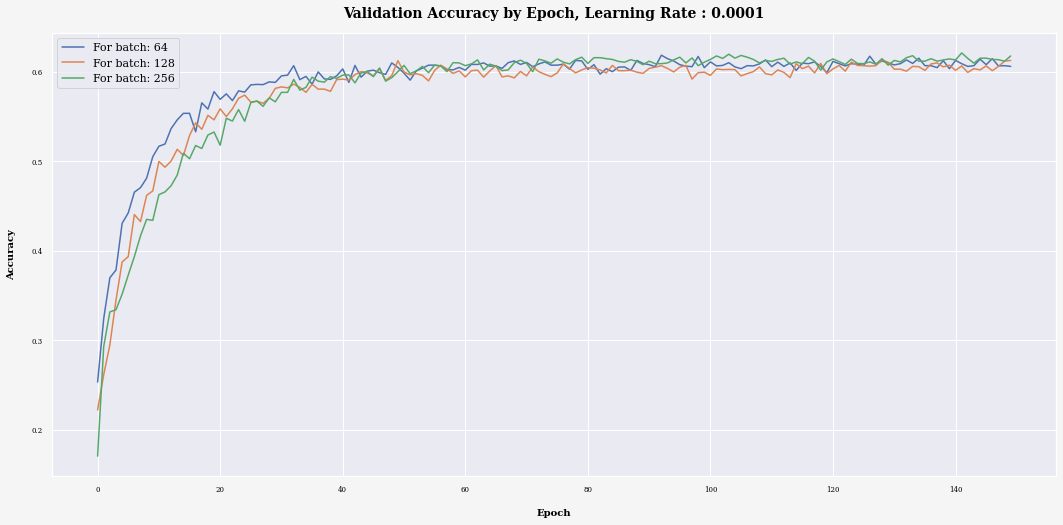

For Learning Rate: 1e-05
train:  Batch: 64, Epoch [1/150], Step [449/449], Loss: 2.1029, Acc: 0.1551
val:  Batch: 64, Epoch [1/150], Step [57/57], Loss: 1.8983, Acc: 0.2001
train:  Batch: 64, Epoch [39/150], Step [449/449], Loss: 1.2786, Acc: 0.3995
val:  Batch: 64, Epoch [39/150], Step [57/57], Loss: 1.5324, Acc: 0.4207
train:  Batch: 64, Epoch [77/150], Step [449/449], Loss: 1.3266, Acc: 0.5157
val:  Batch: 64, Epoch [77/150], Step [57/57], Loss: 1.8721, Acc: 0.5116
train:  Batch: 64, Epoch [115/150], Step [449/449], Loss: 1.5327, Acc: 0.5864
val:  Batch: 64, Epoch [115/150], Step [57/57], Loss: 0.3301, Acc: 0.5486
Training complete in 10m 58s

train:  Batch: 128, Epoch [1/150], Step [225/225], Loss: 2.0194, Acc: 0.1748
val:  Batch: 128, Epoch [1/150], Step [29/29], Loss: 2.0773, Acc: 0.2474
train:  Batch: 128, Epoch [39/150], Step [225/225], Loss: 2.0575, Acc: 0.3615
val:  Batch: 128, Epoch [39/150], Step [29/29], Loss: 1.8075, Acc: 0.3761
train:  Batch: 128, Epoch [77/150], Step [2

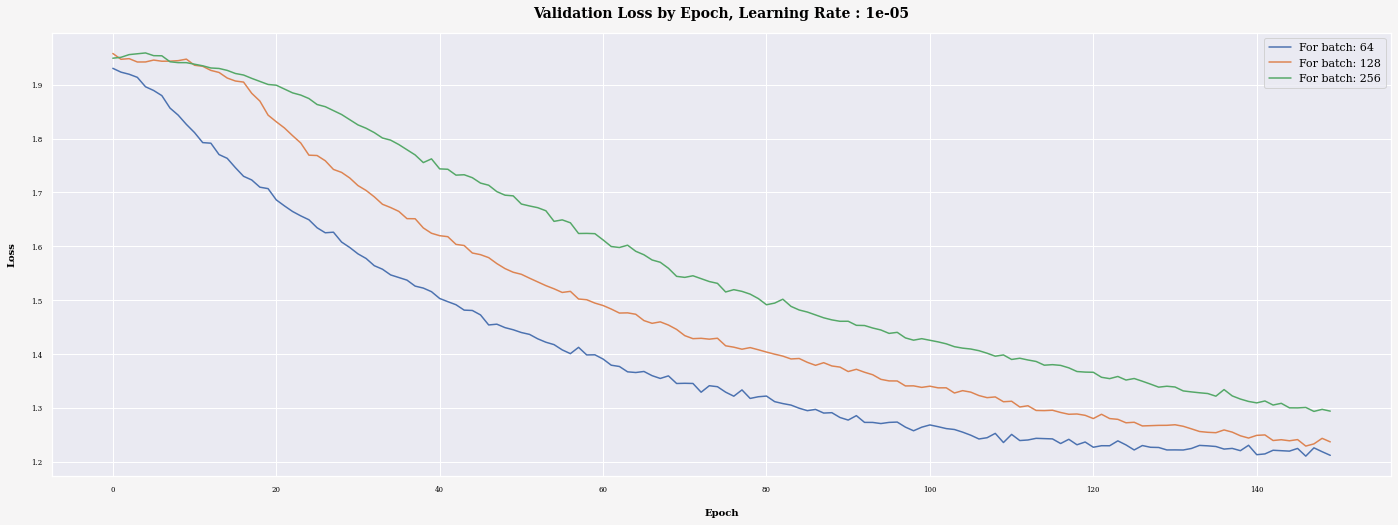

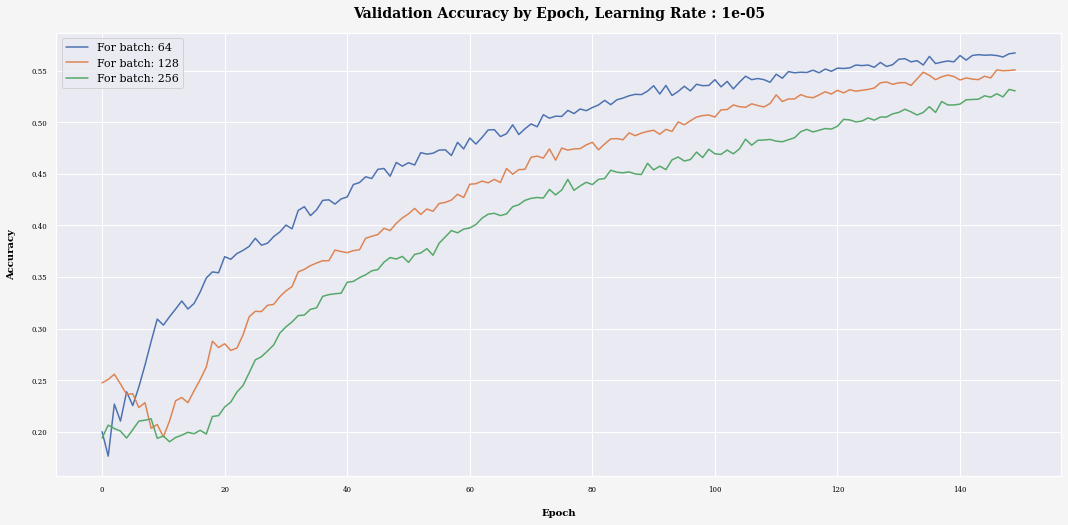

Finished All Trainings !!!
Training complete in 92m 28s


In [50]:
# Hyperparameters
LEARNING_RATE = [0.001, 1e-04, 1e-05]
EPOCHS = 150
BATCH_SIZE = [64, 128, 256]
WEIGHTS = weights_tensor

# Model
model = ConvNet().to(device)
criterion = nn.CrossEntropyLoss(weight=WEIGHTS)

# Training
tuning_model(model, criterion, EPOCHS, BATCH_SIZE, LEARNING_RATE)

## Model Training

train:  Batch: 64, Epoch [1/300], Step [449/449], Loss: 1.8238, Acc: 0.1625
val:  Batch: 64, Epoch [1/300], Step [57/57], Loss: 1.8948, Acc: 0.1702
train:  Batch: 64, Epoch [76/300], Step [449/449], Loss: 1.0944, Acc: 0.5334
val:  Batch: 64, Epoch [76/300], Step [57/57], Loss: 1.7530, Acc: 0.5233
train:  Batch: 64, Epoch [151/300], Step [449/449], Loss: 1.0283, Acc: 0.6674
val:  Batch: 64, Epoch [151/300], Step [57/57], Loss: 0.9477, Acc: 0.5846
train:  Batch: 64, Epoch [226/300], Step [449/449], Loss: 0.3776, Acc: 0.7622
val:  Batch: 64, Epoch [226/300], Step [57/57], Loss: 0.2808, Acc: 0.5965
Training complete in 21m 40s



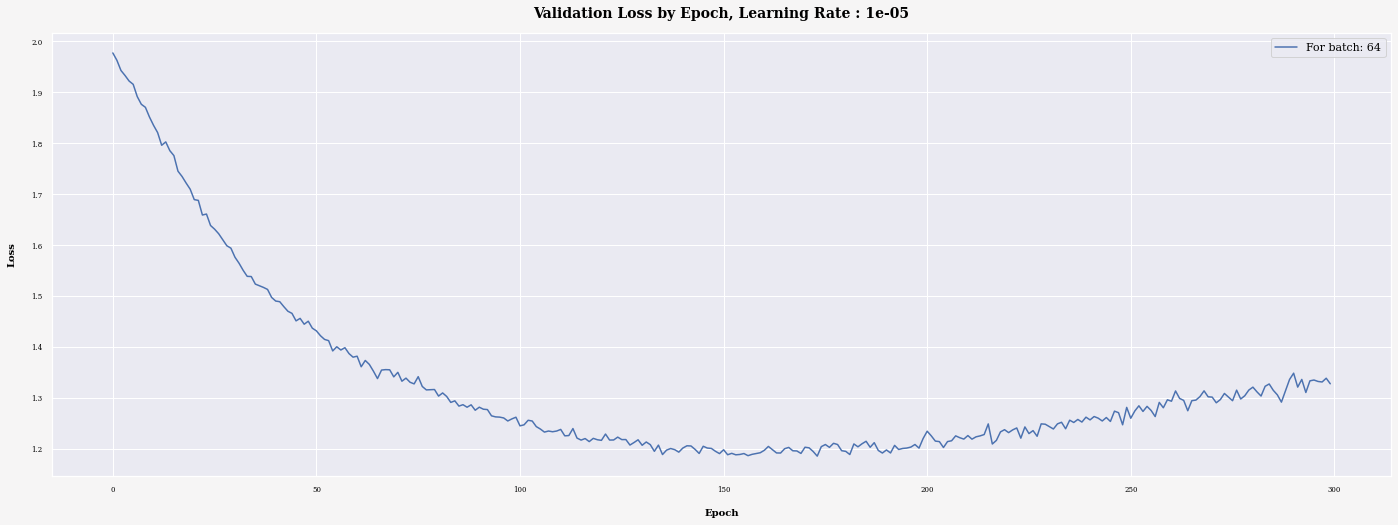

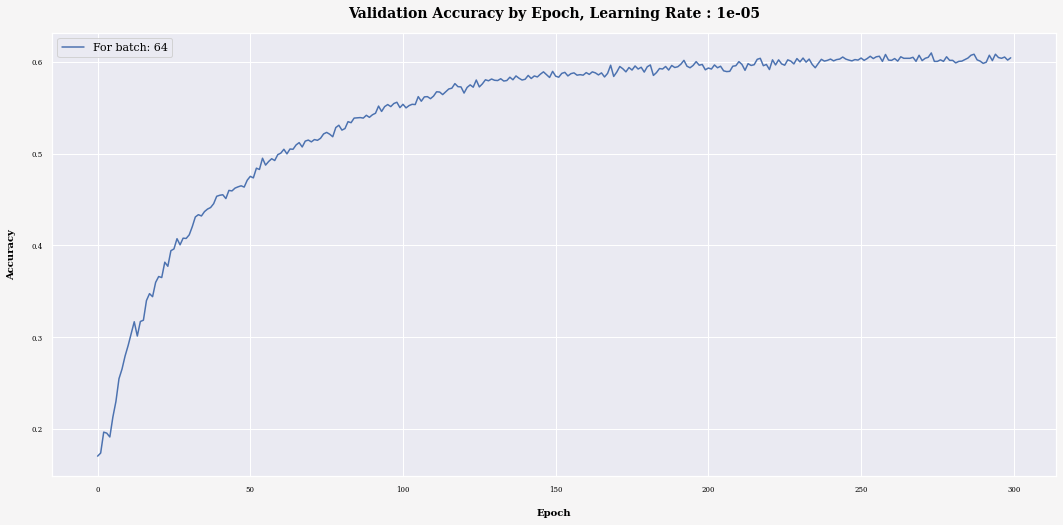

In [23]:

# Hyperparameters
LEARNING_RATE = 1e-05
EPOCHS = 300
BATCH_SIZE = 64
WEIGHTS = weights_tensor

      
model = ConvNet().to(device)
criterion = nn.CrossEntropyLoss(weight=WEIGHTS)
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)


train_dataset = TensorDataset(train_images, df_train_label)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
len_train_data = len(train_dataset)

val_dataset = TensorDataset(val_images, df_val_label)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=True)
len_val_data = len(val_dataset)

data_loaders = {'train': train_loader, 'val': val_loader}
data_sizes = {'train': len_train_data, 'val': len_val_data}

test_dataset = TensorDataset(test_images, df_test_label)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)


loss, acc = calculate_weights(data_loaders, data_sizes, model, optimizer, criterion, batch = BATCH_SIZE,
                  epochs = EPOCHS, training=True)


plot_losses(LEARNING_RATE, loss, EPOCHS)
print()
plot_accuracy(LEARNING_RATE, acc, EPOCHS)

In [24]:
def pred_labels(data_loader, num_labels=num_labels):
      """
            Predicts labels for a given dataset using a pre-trained model and calculates the accuracy of predictions.

            This function loads a pre-trained model saved as 'best-model.pt' and iterates over the given DataLoader to predict labels
            for the dataset. It calculates the overall accuracy of the model as well as the accuracy for each class in the dataset. 
            Predicted labels and true labels are collected and returned for further analysis or evaluation metrics.

            Parameters:
            - data_loader (torch.utils.data.DataLoader): The DataLoader providing the dataset for prediction.
            - num_labels (int): The number of distinct labels/classes in the dataset.

            Returns:
            - pred_test_labels (numpy.ndarray): An array of predicted labels for the dataset.
            - test_labels (numpy.ndarray): An array of true labels for the dataset.

            Side Effects:
            - Loads a model from disk, which could affect memory usage.
            - Prints the overall accuracy of the model on the provided dataset and the accuracy for each class.

            Note:
            - The function assumes that a model named 'best-model.pt' exists in the current working directory and can be loaded directly.
            - The function operates in a non-training mode (torch.no_grad()) to ensure predictions are made without tracking gradients.
            - The `device` variable should be defined globally or within the scope of the function call, indicating whether to use CPU or
              CUDA for computations.
      """
      
      pred_test_labels = []
      test_labels = []
      
      emotions_list = list(emotions.values())
      print(f"{CLR} {str()}")
      
      # Load the entire model
      model = torch.load('best-model.pt')
      
      
      with torch.no_grad():
    
            n_correct = 0
            n_samples = 0
            n_class_correct = [0 for i in range(num_labels)]
            n_class_samples = [0 for i in range(num_labels)]
            
            for images, labels in data_loader:
                  
                  images, labels = images.to(device), labels.to(device)
                  outputs = model(images)
                  # max returns (value ,index)
                  _, predicted = torch.max(outputs, 1)
                  n_samples += labels.size(0)
                  n_correct += (predicted == labels).sum().item()
                  
                  pred_test_labels.extend(predicted.cpu().numpy())
                  test_labels.extend(labels.cpu().numpy())
                  

                  for i in range(len(labels)):
                        label = labels[i].item()
                        pred = predicted[i].item()
                        if (label == pred):
                              n_class_correct[label] += 1
                        n_class_samples[label] += 1
      

            pred_test_labels = np.array(pred_test_labels)
            test_labels = np.array(test_labels)

            
            acc = 100.0 * n_correct / n_samples
            print(f'{CLR}Accuracy of {RED}The Network  {BLUE}{acc:.3f} %', sep='')

            for i in range(num_labels):
                  acc = 100.0 * n_class_correct[i] / n_class_samples[i]
                  print(f'{CLR}Accuracy of {RED}{emotions_list[i]}  {BLUE}{acc:.3f} %')
      
      print()  
    
      return pred_test_labels, test_labels
                  
      

 
Accuracy of The Network  95.886 %
Accuracy of Angry  96.896 %
Accuracy of Disgust  100.000 %
Accuracy of Fear  94.752 %
Accuracy of Happy  96.480 %
Accuracy of Sad  93.188 %
Accuracy of Surprise  97.193 %
Accuracy of Neutral  96.576 %



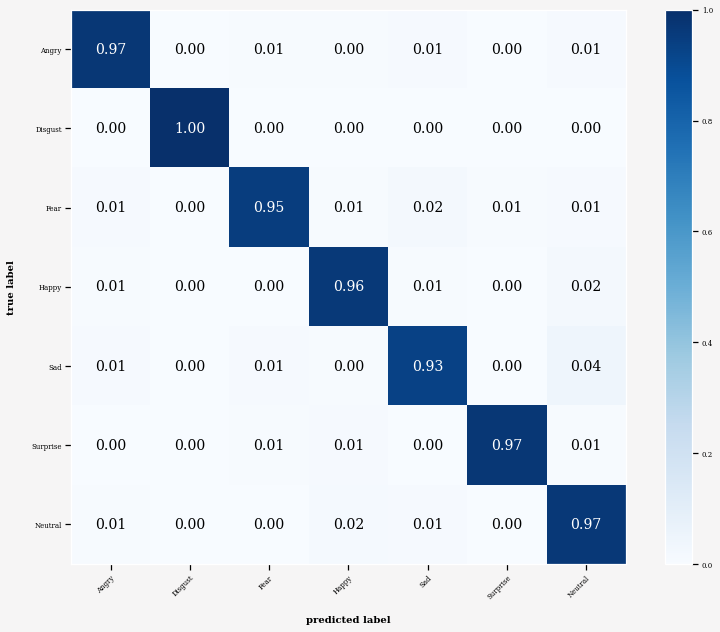

In [25]:
pred_test_labels, test_labels = pred_labels(train_loader)


conf_mat = confusion_matrix(test_labels, pred_test_labels)
fig, ax = plot_confusion_matrix(conf_mat=conf_mat,
                                show_normed=True,
                                show_absolute=False,
                                colorbar=True,
                                class_names=emotions.values(),
                                figsize=(14, 10))
fig.show()

 
Accuracy of The Network  62.357 %
Accuracy of Angry  51.935 %
Accuracy of Disgust  63.636 %
Accuracy of Fear  42.992 %
Accuracy of Happy  81.456 %
Accuracy of Sad  47.980 %
Accuracy of Surprise  75.721 %
Accuracy of Neutral  64.696 %



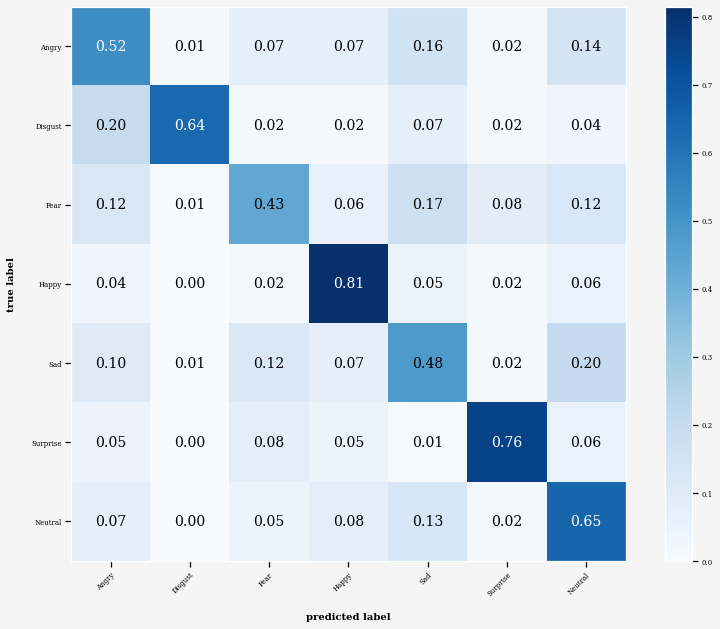

In [26]:
pred_test_labels, test_labels = pred_labels(test_loader)


conf_mat = confusion_matrix(test_labels, pred_test_labels)
fig, ax = plot_confusion_matrix(conf_mat=conf_mat,
                                show_normed=True,
                                show_absolute=False,
                                colorbar=True,
                                class_names=emotions.values(),
                                figsize=(14, 10))
fig.show()